In [93]:
import numpy as np
import pandas as pd
import ast

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns

# Loading Data

In [3]:
df = pd.read_pickle("data/df_train.pkl")

df_train, df_val = train_test_split(df, test_size= 0.1, random_state=42)

In [4]:
X_train = df_train.business_description_embedding.apply(ast.literal_eval).tolist()
X_train = np.array(X_train)

X_val = df_val.business_description_embedding.apply(ast.literal_eval).tolist()
X_val = np.array(X_val)

In [5]:
df_train.head(5)

,id,industry,business_description_embedding
31138,34170,Financial Services,"[0.019633012,0.009427597,0.006240986,0.0177257..."
15120,16504,Technology Hardware & Equipment,"[0.026561439,-0.049749356,-0.006847293,-0.0088..."
23693,25893,Consumer Durables & Apparel,"[0.0115894,-0.035240766,-0.029952582,0.0226988..."
39126,43226,Materials,"[-0.025557408,0.0636078,-0.01350581,-0.0180223..."
29963,32875,Health Care Equipment & Services,"[0.026474293,0.06491662,-0.040673323,-0.082956..."


In [6]:
print("train shape", X_train.shape)
print("val shape", X_val.shape)

train shape (28535, 768)
val shape (3171, 768)


# Transforming Data (Label Encoding)

### Tasks:
- Use the scikit-learn label encoder to encode the industry names
- Check if all classes contained in the validation set are also in the training set

#

In [11]:
label_encoder = LabelEncoder()
label_encoder.fit(df_train["industry"])

LabelEncoder()

In [26]:
y_train = label_encoder.transform(df_train["industry"])
y_val =  label_encoder.transform(df_val["industry"])
train_label_set = set(y_train)
val_label_set = set(y_val)
assert all(val_label in train_label_set for val_label in val_label_set)

# Visualize the data

### Tasks:
- Are certain classes over- or under represented? Either produce a table or a plot to show this.
- Inspect whether there is signal in the business description embeddings:
    - Perform a PCA to project data into 2 dimensions
    - Plot projected data in Scatterplot and color based on classes
    - Provide a description of what you see and judge whether there is signal in the data that allows industry classification

Important: Ensure that your plots have proper axis descriptions and titles. Style the plots so that differences in class distributions are visible (e.g. scatter size, transparency, color, etc.)

### Class distribution

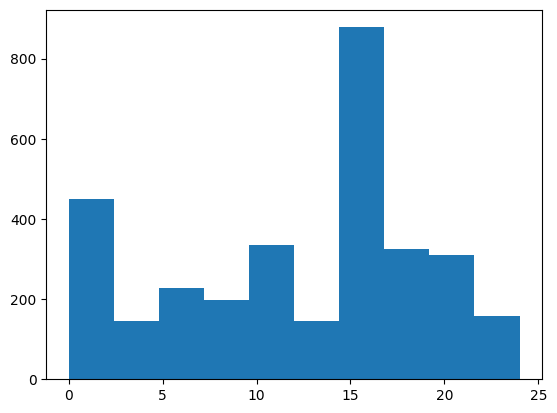

Label 0 occurs 572 times in the training set.
Label 1 occurs 874 times in the training set.
Label 2 occurs 2805 times in the training set.
Label 3 occurs 726 times in the training set.
Label 4 occurs 591 times in the training set.
Label 5 occurs 1037 times in the training set.
Label 6 occurs 591 times in the training set.
Label 7 occurs 158 times in the training set.
Label 8 occurs 1174 times in the training set.
Label 9 occurs 387 times in the training set.
Label 10 occurs 1740 times in the training set.
Label 11 occurs 956 times in the training set.
Label 12 occurs 911 times in the training set.
Label 13 occurs 206 times in the training set.
Label 14 occurs 264 times in the training set.
Label 15 occurs 7604 times in the training set.
Label 16 occurs 827 times in the training set.
Label 17 occurs 1742 times in the training set.
Label 18 occurs 825 times in the training set.
Label 19 occurs 545 times in the training set.
Label 20 occurs 1384 times in the training set.
Label 21 occurs 

In [ ]:
# Plot the class distribution or provide a table that shows how many times each class (industry) appears
# Describe your findings
from matplotlib import pyplot as plt
plt.hist(y_val)
plt.show()
for label in val_label_set:
    print(f"Label {label} occurs {list(y_train).count(label)} times in the training set.")
# The data classes are unbalanced.

### PCA - Dimensionality reduction and visualization

[[  0.92945171  -5.30825858  -6.46820872 ...  26.4733045   -4.04729698
   -4.85275948]
 [-12.17099966   3.71343631   4.27476793 ...   0.4133363   -4.57071633
   -0.07580971]]


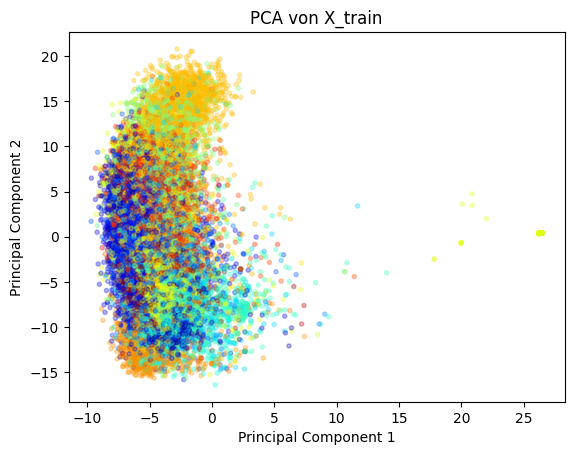

In [49]:
# Performa a PCA and plot the projected data. Color the scatter plot based on the classes
# Analyse what you see
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(2)
princ_comps = pca.fit_transform(X_scaled).transpose()

print(princ_comps)
plt.scatter(princ_comps[0], princ_comps[1], marker=".", alpha=0.3, c=y_train, cmap="jet")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA von X_train")

plt.show()

Clusters with different colours can be seen, so there is a signal in the data. Many classes have a lot of overlap though, which can hint at difficulties for classification.

# Fitting and comparing Classifier Models

### Tasks:
- Split the data into train and validation data <- I don't get this task. That's what you already did, isn't it?
- Encode the industry labels using LabelEncoder (scikit-learn)
- Fit a LogisticRegression and a kNN-classifier
- Compare the model performance of both models:
    - Compute Accuracy and F1 score
        - Interpret the scores: Explain how they are computed and judge if your model performs well
        - Analyze the classification errors: 
            - Do the errors correlate with how well classes are represented?
            - Which industries does the model identify well and which seem to be similar?
    - Plot a confusion matrix for both models (combine scikit-learn confusion matrix and seaborn heatmap plot)
    - Do both models misclassify the same examples?

Import: Use proper axis labels for the plots! 

In [78]:
print(len(train_label_set))
knn = KNeighborsClassifier(len(train_label_set))
log_reg = LogisticRegression()

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

knn_preds = knn.predict(X_val)
log_reg_preds = log_reg.predict(X_val)

25


In [91]:
knn_accuracy = len(np.where(y_val == knn_preds)[0]) / len(y_val)
log_reg_accuracy = len(np.where(y_val == log_reg_preds)[0]) / len(y_val)
knn_f1 = f1_score(y_val, knn_preds, average="weighted")
log_reg_f1 = f1_score(y_val, log_reg_preds, average="weighted")

print(f"Accuracy with the KNN classifier is {knn_accuracy*100:.2f}%, and with logicstic regression it's {log_reg_accuracy:.2f}%.")
print(f"F1 score with the KNN classifier is {knn_f1:.3f}, and with logicstic regression it's {log_reg_f1:.3f}.")

print(f"Most common class makes up {max([list(y_train).count(label) for label in train_label_set]) / len(X_train):.3f} of the training set.")



Accuracy with the KNN classifier is 76.54%, and with logicstic regression it's 0.77%.
F1 score with the KNN classifier is 0.759, and with logicstic regression it's 0.766.
Most common class makes up 0.266 of the training set.


Compared to the baseline of a model always predicting the most common class, both the KNN model and the logistic regression model perform quite well.
The accuracy is simply the number of correctly classified samples divided by number of total samples.
The F1 score is the harmonic mean of precision and recall and thus a better metric for a models predictive power in a dataset with unbalanced classes like the one we have here.

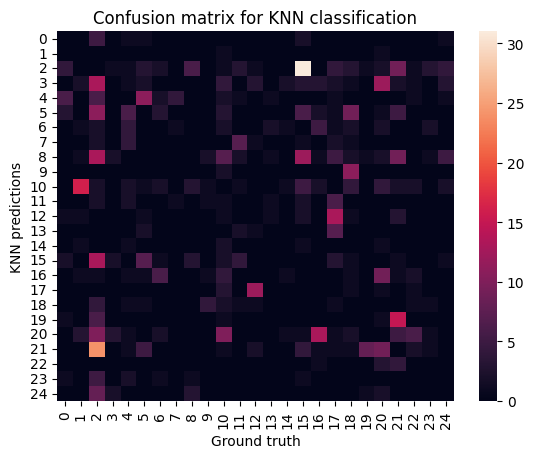

Text(0.5, 1.0, 'Confusion matrix for Logistic regression classification')

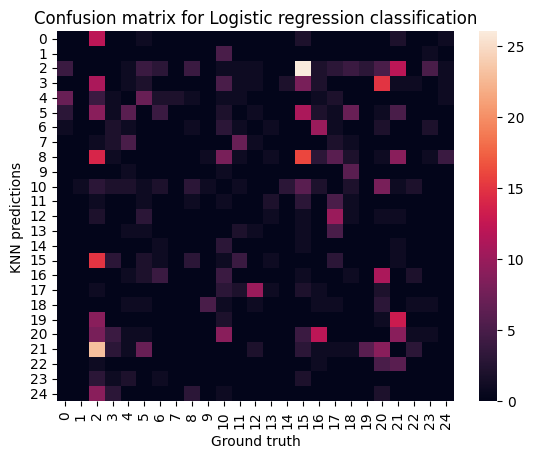

In [102]:
knn_confusion = confusion_matrix(y_val, knn_preds)
log_reg_confusion = confusion_matrix(y_val, log_reg_preds)
sns.heatmap(knn_confusion - np.diag(np.diag(knn_confusion)))
plt.xlabel("Ground truth")
plt.ylabel("KNN predictions")
plt.title("Confusion matrix for KNN classification")
plt.show()
sns.heatmap(log_reg_confusion -np.diag(np.diag(log_reg_confusion)))
plt.xlabel("Ground truth")
plt.ylabel("KNN predictions")
plt.title("Confusion matrix for Logistic regression classification")


Both models make very similar confusions. One notable exception would be confusing a true label 1 for a label 10. This confusion only occurs in the KNN classificaiton. Other confusions vary less. See the following visualizations of the differences between the two matrices.

Text(0.5, 1.0, 'Confusion matrix differences KNN vs Logistic regression')

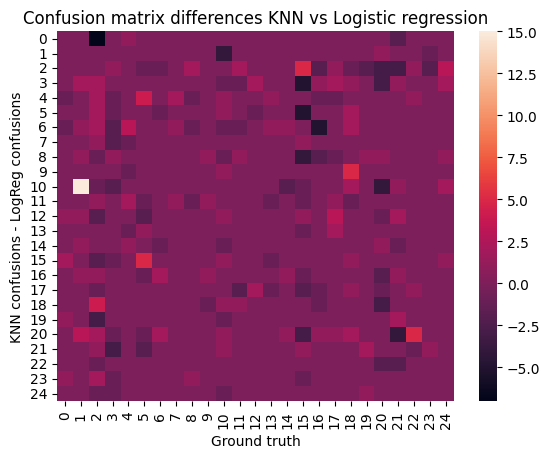

In [106]:
sns.heatmap(knn_confusion - np.diag(np.diag(knn_confusion)) -(log_reg_confusion - np.diag(np.diag(log_reg_confusion))))
plt.xlabel("Ground truth")
plt.ylabel("KNN confusions - LogReg confusions")
plt.title("Confusion matrix differences KNN vs Logistic regression")

# Optional: Confidence Weighted Prediction

## Deliverables:

- Provide a notebook with the implementation and training of a industry classifier model
- The model shall output the industry classification and its confidence as a tuple of vectors $(\hat{y}_{pred}, \hat{y}_{confidence})$
- The confidence score must be between 0 and 1, $\hat{y}_{confidence} [i] \in [0,1]$
- Your model will be evaluated on a private test set
- The designing the confidence score is your task. You may use p-values, a voting mechanism of multiple models, or other techniques
- Another option is to add more features, e.g. financial data, to X

In [139]:
def confidence_weighted_f1(y_true, y_pred, confidence):
    # Weight all predictions, not just positives
    weighted_tp = np.sum(confidence * (y_pred == 1) * (y_true == 1))
    weighted_fp = np.sum(confidence * (y_pred == 1) * (y_true == 0))
    weighted_fn = np.sum(confidence * (y_pred == 0) * (y_true == 1))
    
    precision = weighted_tp / (weighted_tp + weighted_fp) if (weighted_tp + weighted_fp) > 0 else 0
    recall = weighted_tp / (weighted_tp + weighted_fn) if (weighted_tp + weighted_fn) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1